In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
artist_threshold = 70
user_threshold = 10

In [3]:
df = pd.read_csv("user_artists.dat", sep="\s+")

In [4]:
df

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
5,2,56,6152
6,2,57,5955
7,2,58,4616
8,2,59,4337
9,2,60,4147


In [5]:
tmp = df.groupby(by=['artistID']).userID.nunique()
artists = tmp[tmp > artist_threshold].index
artists

Int64Index([   7,   51,   53,   55,   56,   58,   59,   64,   65,   67,
            ...
            1513, 1613, 1672, 1934, 2083, 2343, 2346, 2521, 3057, 3200],
           dtype='int64', name='artistID', length=220)

In [6]:
filtered = df[df.artistID.isin(artists)]
tmp = filtered.groupby(by=['userID']).artistID.nunique()
users = tmp[tmp > user_threshold].index
users

Int64Index([   2,    4,    5,    7,    8,   10,   11,   12,   13,   15,
            ...
            2083, 2084, 2086, 2087, 2088, 2092, 2093, 2094, 2096, 2097],
           dtype='int64', name='userID', length=1322)

In [7]:
final = filtered[filtered.userID.isin(users)]
final

,userID,artistID,weight
0,2,51,13883
2,2,53,11351
4,2,55,8983
5,2,56,6152
7,2,58,4616
8,2,59,4337
13,2,64,3644
14,2,65,3579
16,2,67,3301
19,2,70,2686


In [8]:
tmp = final.pivot_table(index="userID", columns="artistID", values="weight", fill_value=0)
matrix = tmp.to_numpy()
matrix.shape

(1322, 220)

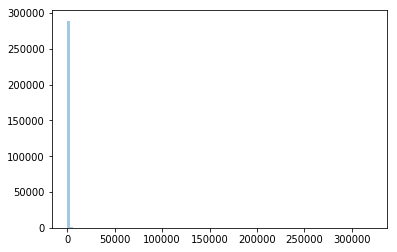

In [9]:
sb.distplot(matrix.ravel(), bins=100, kde=False)

In [10]:
len(np.where(matrix.ravel()>0)[0])

29707

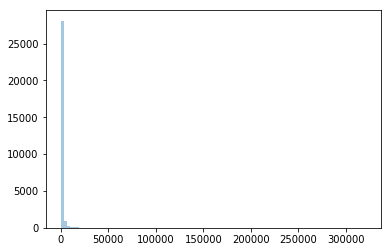

In [11]:
nonzero = matrix.ravel()[np.where(matrix.ravel()>0)]
sb.distplot(nonzero, bins=100, kde=False)

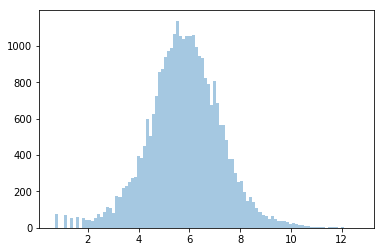

In [12]:
sb.distplot(np.log(1+nonzero), bins=100, kde=False)

In [14]:
norm_matrix = matrix / np.max(matrix)
log_matrix = np.log(1+matrix)
norm_log_matrix = log_matrix / np.max(log_matrix)
np.save('lastfm', norm_matrix)
np.save('lastfmlog', norm_log_matrix)